# TP2 Machine Learning - Part 2: Heterogeneous data  

*William BLAUFUKS* & *Virgile FOY*  

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## 1. Data loading & preprocessing

In [106]:
df = pd.read_csv('credit.data', sep='\t', header=None)
pd.options.display.max_rows = 200
df.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [59]:
# Split numerical and categorical attributes
df_num = df[[1, 2, 7, 10, 13, 14]]
df_cat = df[[0, 3, 4, 5, 6, 8, 9, 11, 12]]
df_y = df[[15]]

In [60]:
# Numerical attributes
X_num = df_num.to_numpy()
np.place(X_num, X_num=='?', [float('NaN')])
X_num = X_num.astype('float32')

In [61]:
# Remove individuals with at least one NaN
X_num = X_num[~np.isnan(X_num).any(axis=1)]

I don't understand why we are asked to convert the dataframe into a numpy array. In the previous example it made sense as all the features were numerical. But here some attributes are categorical, and it's a bad practice to split the attributes and to use numpy arrays as we loose the *index* concept. Because if we want to alter some rows based on a given criteria, then we'll have to repeat the operation twice, and we'll need to be very careful about which rows to alter and which rows not to alter. For the sake of this example, we decided to start from scratch from now on and use a slightly different approach, only using pandas dataframes (and numpy also but as late as we can).

In [62]:
# Replace '?' with NaN values
df = df.replace('?', float('NaN'))

# Replace '-/+' with 0/1
df = df.replace(['-', '+'], [0, 1])

# Specify types
num_col = [1, 2, 7, 10, 13, 14]
cat_col = [0, 3, 4, 5, 6, 8, 9, 11, 12]
for col in range(15):
    if col in num_col:
        df[col] = df[col].astype('float64')
    elif col in cat_col:
        df[col] = df[col].astype('O')
df[15] = df[15].astype('int64')

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 16 columns):
0     676 non-null object
1     676 non-null float64
2     688 non-null float64
3     683 non-null object
4     683 non-null object
5     680 non-null object
6     680 non-null object
7     688 non-null float64
8     688 non-null object
9     688 non-null object
10    688 non-null float64
11    688 non-null object
12    688 non-null object
13    677 non-null float64
14    688 non-null float64
15    688 non-null int64
dtypes: float64(6), int64(1), object(9)
memory usage: 86.1+ KB


## 2. Drop missing values

In [63]:
# Drop rows with at least one NaN 
df = df.dropna(axis=0, how='any')

In [64]:
df.shape

(653, 16)

The dataset contains 653 individuals with only non-null values.

Text(0.5, 0, 'y')

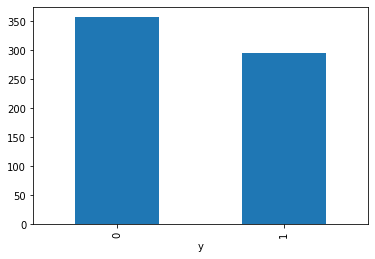

In [67]:
# distribution of the dependent variable
df[15].value_counts().plot(kind='bar')
plt.xlabel('y')

Note that here the dataset is quite well balanced (almost as many positives than negatives). 

In [108]:
def run_classifier(classifier, classifier_parameters, scoring, normalizer=None, missing_values_num='median', missing_values_cat='constant'):
    

    # We create the preprocessing pipelines for both numeric and categorical data.
    numeric_features = [1, 2, 7, 10, 13, 14]
    if normalizer == None:
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy=missing_values_num))]) # dummy operator: missing values are already removed
    elif normalizer == 'standard':
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy=missing_values_num)), # dummy operator: missing values are already removed
            ('scaler', StandardScaler())])
    elif normalizer == 'min-max':
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy=missing_values_num)), # dummy operator: missing values are already removed
            ('scaler', MinMaxScaler())])
        
    categorical_features = [0, 3, 4, 5, 6, 8, 9, 11, 12]
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=missing_values_cat, fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # common categorical features preprocessing

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])

    # Grid search the pipeline
    grid_parameters = {}
    for key in classifier_parameters:
        grid_parameters['classifier__' + key] = classifier_parameters[key]

    search = GridSearchCV(pipeline, grid_parameters, scoring=scoring, iid=False, cv=5, refit=False)
    search.fit(X, y)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

In [109]:
X = df.drop(15, axis=1)
y = df[15]

scorings = ['roc_auc', 'precision', 'accuracy']

### 2.1 K-nn model

In [110]:
classifier = KNeighborsClassifier()
classifier_parameters = {'n_neighbors': np.arange(1,30)}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring)
    print('')

roc_auc criterion
Best parameter (CV score=0.746):
{'classifier__n_neighbors': 28}

precision criterion
Best parameter (CV score=0.735):
{'classifier__n_neighbors': 8}

accuracy criterion
Best parameter (CV score=0.690):
{'classifier__n_neighbors': 8}



### 2.2 CART model

In [96]:
classifier = DecisionTreeClassifier(random_state=1)
classifier_parameters = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth': np.concatenate((np.arange(1, 5), 5*np.arange(1, 21)))
}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring)
    print('')

roc_auc criterion
Best parameter (CV score=0.903):
{'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__splitter': 'random'}

precision criterion
Best parameter (CV score=0.849):
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__splitter': 'best'}

accuracy criterion
Best parameter (CV score=0.864):
{'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__splitter': 'best'}



The CART model seems much better than the K-nn model. Especially for AUC criterion.

## 3. Normalize numeric features

### 3.1 K-nn model with standard scaler

In [98]:
classifier = KNeighborsClassifier()
classifier_parameters = {'n_neighbors': np.arange(1,30)}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring, normalizer='standard')
    print('')

roc_auc criterion
Best parameter (CV score=0.906):
{'classifier__n_neighbors': 26}

precision criterion
Best parameter (CV score=0.871):
{'classifier__n_neighbors': 28}

accuracy criterion
Best parameter (CV score=0.839):
{'classifier__n_neighbors': 9}



### 3.2 K-nn model with min-max scaler

In [104]:
classifier = KNeighborsClassifier()
classifier_parameters = {'n_neighbors': np.arange(1,30)}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring, normalizer='min-max')
    print('')

roc_auc criterion
Best parameter (CV score=0.907):
{'classifier__n_neighbors': 28}

precision criterion
Best parameter (CV score=0.873):
{'classifier__n_neighbors': 6}

accuracy criterion
Best parameter (CV score=0.856):
{'classifier__n_neighbors': 12}



### 3.3 CART model with standard scaler

In [103]:
classifier = DecisionTreeClassifier(random_state=1)
classifier_parameters = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth': np.concatenate((np.arange(1, 5), 5*np.arange(1, 21)))
}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring, normalizer='standard')
    print('')

roc_auc criterion
Best parameter (CV score=0.903):
{'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__splitter': 'random'}

precision criterion
Best parameter (CV score=0.849):
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__splitter': 'best'}

accuracy criterion
Best parameter (CV score=0.864):
{'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__splitter': 'best'}



### 3.4 CART model with min-max scaler

In [105]:
classifier = DecisionTreeClassifier(random_state=1)
classifier_parameters = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth': np.concatenate((np.arange(1, 5), 5*np.arange(1, 21)))
}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring, normalizer='min-max')
    print('')

roc_auc criterion
Best parameter (CV score=0.903):
{'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__splitter': 'random'}

precision criterion
Best parameter (CV score=0.849):
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__splitter': 'best'}

accuracy criterion
Best parameter (CV score=0.864):
{'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__splitter': 'best'}



The AUC is much higher after normalization. __After removing the missing values, the best precision (87.3%) is obtained with a k-nn model (n_neighbors=6) following a min-max normalization.__ Note that here the k-nn and the CART models have very similar performance indicators.   

## 4 Dealing with missing values

In [112]:
# Load data
df = pd.read_csv('credit.data', sep='\t', header=None)

# Replace '?' with NaN values
df = df.replace('?', float('NaN'))

# Replace '-/+' with 0/1
df = df.replace(['-', '+'], [0, 1])

# Specify types
num_col = [1, 2, 7, 10, 13, 14]
cat_col = [0, 3, 4, 5, 6, 8, 9, 11, 12]
for col in range(15):
    if col in num_col:
        df[col] = df[col].astype('float64')
    elif col in cat_col:
        df[col] = df[col].astype('O')
df[15] = df[15].astype('int64')

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 16 columns):
0     676 non-null object
1     676 non-null float64
2     688 non-null float64
3     683 non-null object
4     683 non-null object
5     680 non-null object
6     680 non-null object
7     688 non-null float64
8     688 non-null object
9     688 non-null object
10    688 non-null float64
11    688 non-null object
12    688 non-null object
13    677 non-null float64
14    688 non-null float64
15    688 non-null int64
dtypes: float64(6), int64(1), object(9)
memory usage: 86.1+ KB


In [117]:
# We can re-use the function 'run_classifer' from the previous part
# and add the parameters 'missing_values_num' and 'missing_values_cat'
# to deal with missing values with the appropriate strategy.

X = df.drop(15, axis=1)
y = df[15]

scorings = ['roc_auc', 'precision', 'accuracy']

# Test
X.shape
y.shape

(688,)

Note that only 5% of rows have missing values, simply dropping them from the dataset makes sense.

### 4.1 K-nn model

In [116]:
classifier = KNeighborsClassifier()
classifier_parameters = {'n_neighbors': np.arange(1,30)}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring, normalizer='min-max',
                  missing_values_num='mean', missing_values_cat='most_frequent')
    print('')

roc_auc criterion
Best parameter (CV score=0.905):
{'classifier__n_neighbors': 21}

precision criterion
Best parameter (CV score=0.878):
{'classifier__n_neighbors': 6}

accuracy criterion
Best parameter (CV score=0.858):
{'classifier__n_neighbors': 25}



### 4.2 CART model

In [118]:
classifier = DecisionTreeClassifier(random_state=1)
classifier_parameters = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth': np.concatenate((np.arange(1, 5), 5*np.arange(1, 21)))
}

for scoring in scorings:
    print(scoring + ' criterion')
    print('=======================')
    run_classifier(classifier, classifier_parameters, scoring, normalizer='min-max',
                  missing_values_num='mean', missing_values_cat='most_frequent')
    print('')

roc_auc criterion
Best parameter (CV score=0.901):
{'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__splitter': 'random'}

precision criterion
Best parameter (CV score=0.853):
{'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__splitter': 'random'}

accuracy criterion
Best parameter (CV score=0.856):
{'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__splitter': 'best'}



It turns out that __after filling NaN values, the best precision we have got is 87.8%.__, which is slightly better than what we get when we drop the missing values.